In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
from scipy.stats import randint as sp_randint
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from prettytable import PrettyTable

In [2]:
df = pd.DataFrame(pd.read_excel("Dataset_Bonus_project.xlsx"))
pd.pandas.set_option('display.max_rows',None)
pd.pandas.set_option('display.max_columns',None)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [4]:
cols=[i for i in df.columns]
print(cols)

['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df.isnull().head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

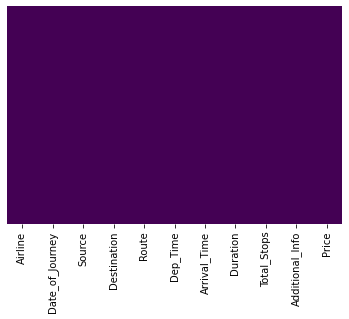

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.dropna(inplace = True)

In [11]:
df[df.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [12]:
df.drop_duplicates(keep='first',inplace=True)

In [13]:
df.shape

(10462, 11)

In [14]:
df["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [15]:
# 2 different No info and No Info are there so replacing No Info by No info
df['Additional_Info']=df['Additional_Info'].replace('No Info','No info')

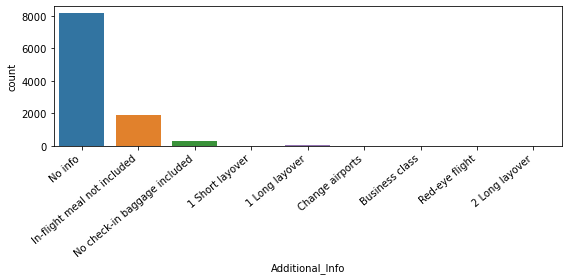

In [16]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x="Additional_Info", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [17]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [18]:
df["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [19]:
df["Additional_Info"].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

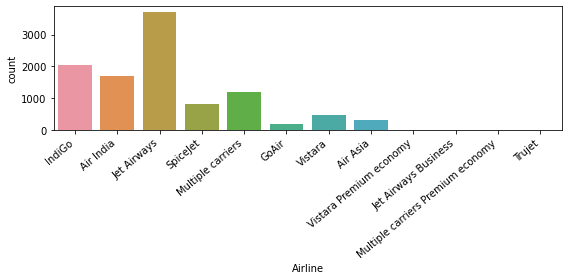

In [20]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x="Airline", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [21]:
df["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [22]:
df["Route"].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1536
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
CCU → DEL → BLR                       565
BLR → BOM → DEL                       402
MAA → CCU                             381
DEL → HYD → COK                       326
DEL → BLR → COK                       232
DEL → COK                             213
DEL → JAI → BOM → COK                 183
DEL → MAA → COK                       146
DEL → AMD → BOM → COK                 144
DEL → IDR → BOM → COK                  90
DEL → HYD → MAA → COK                  83
CCU → MAA → BLR                        65
CCU → HYD → BLR                        53
CCU → BBI → BLR                        50
DEL → BHO → BOM → COK                  48
CCU → IXR → DEL → BLR                  46
DEL → HYD → BOM → COK                  45
DEL → GOI → BOM → COK                  44
DEL → CCU → BOM → COK             

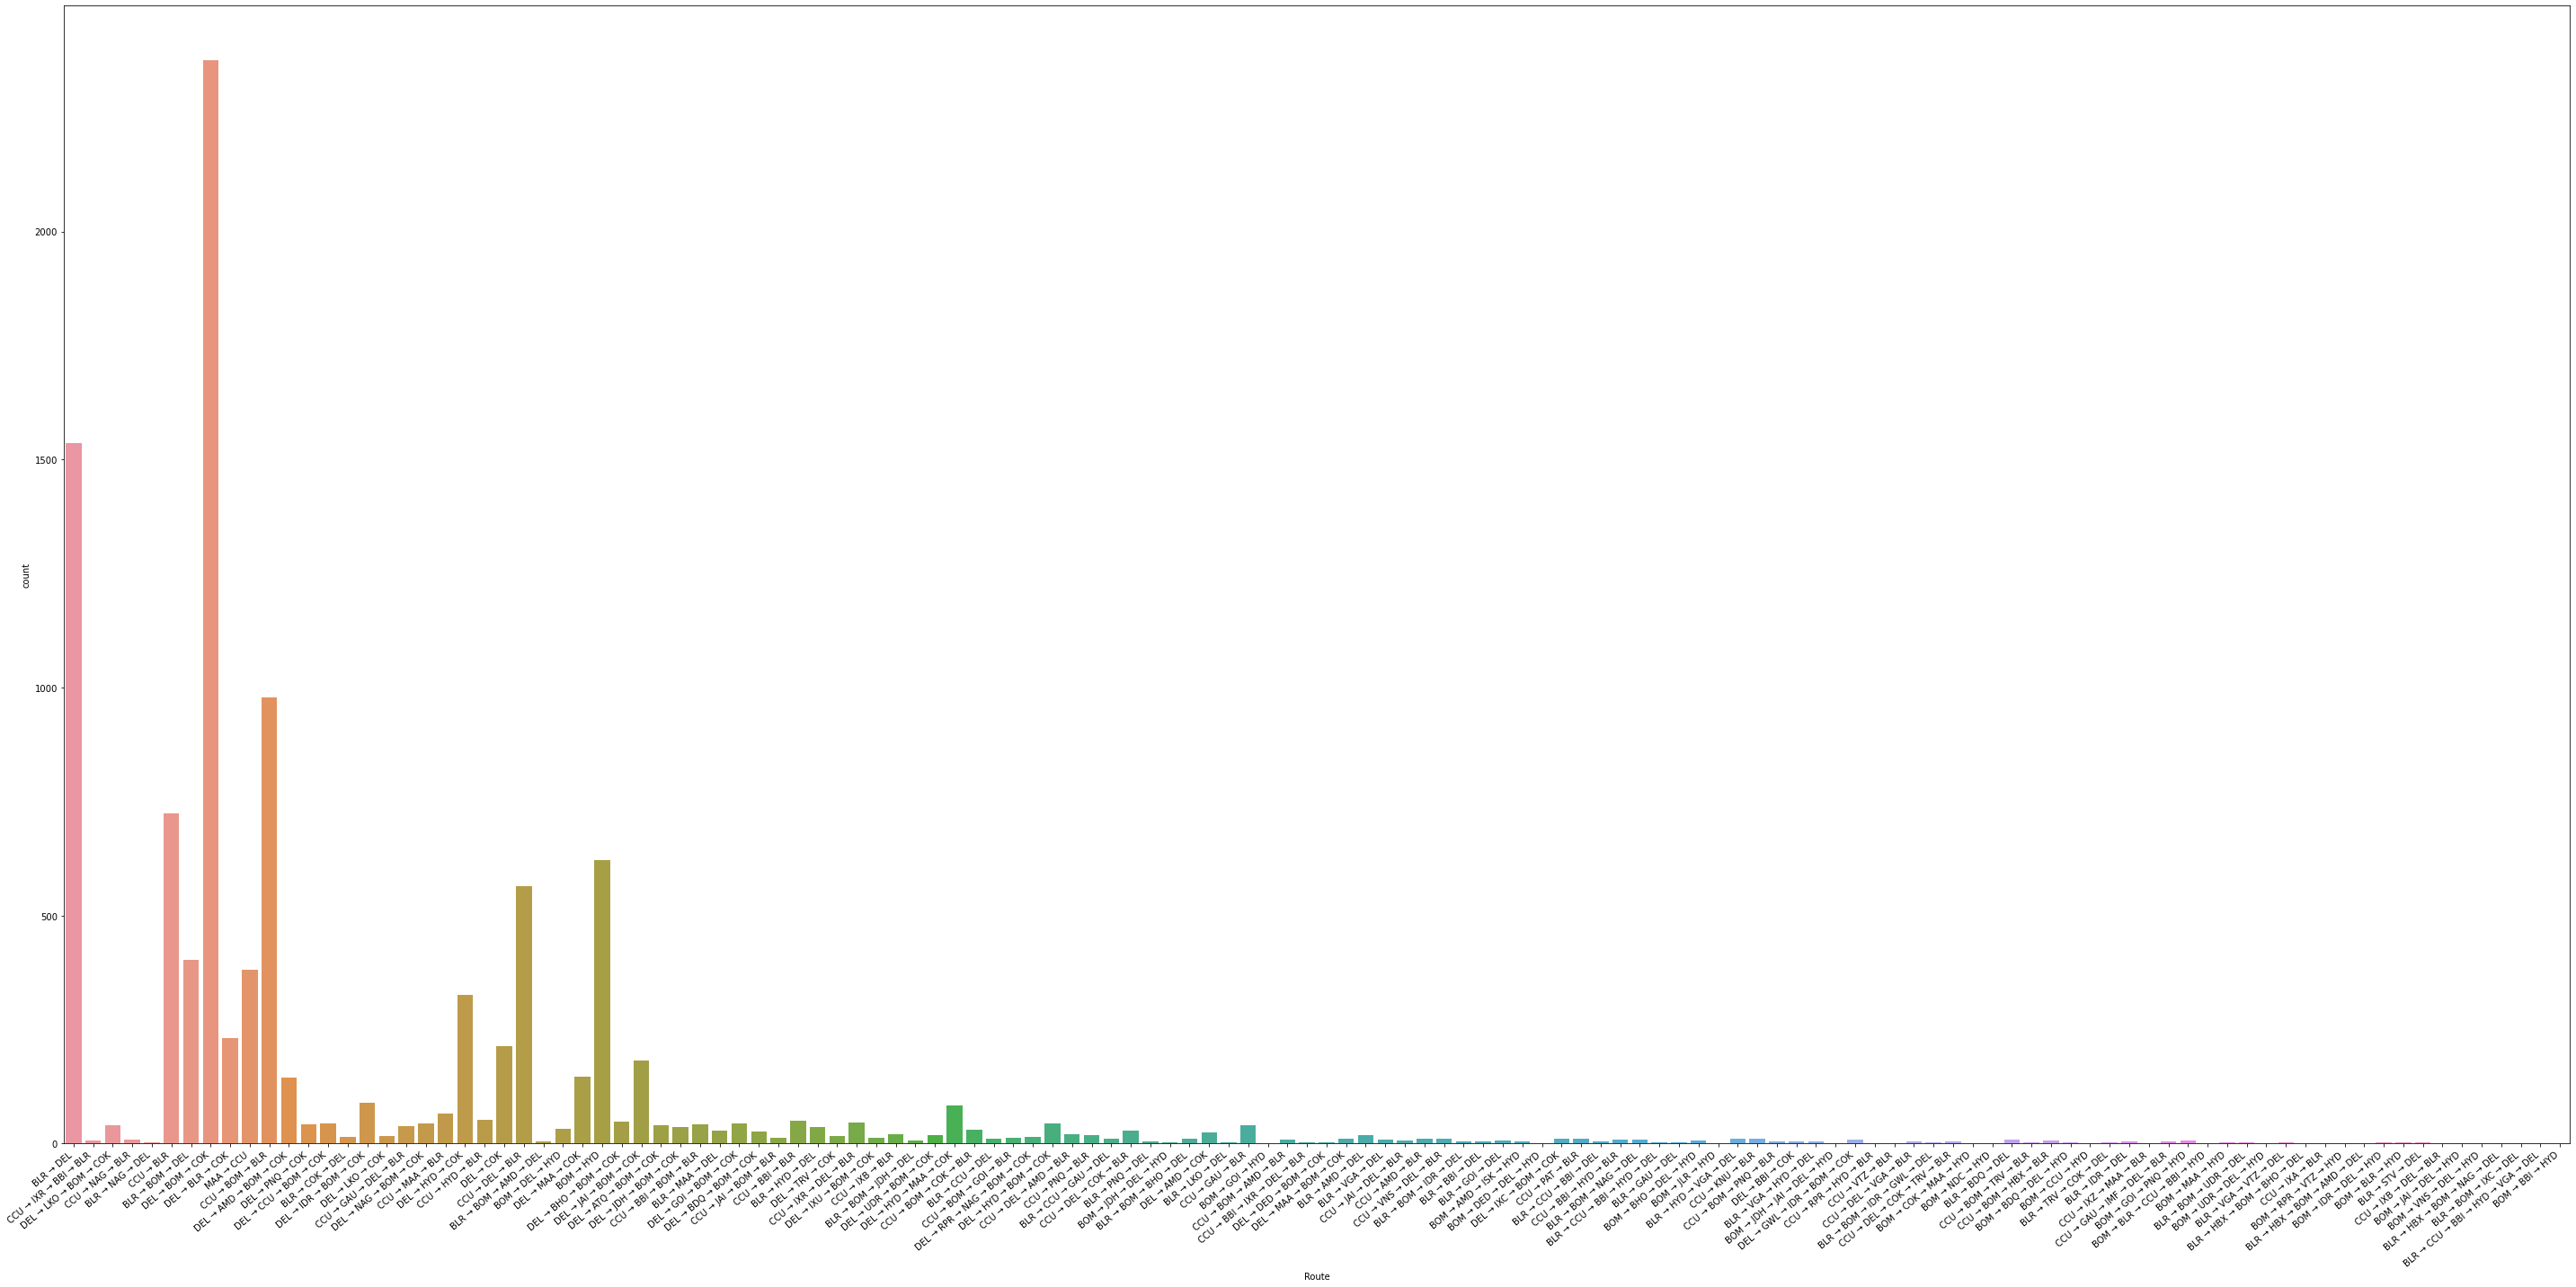

In [23]:
plt.figure(figsize=(40,20))
ax = sns.countplot(x="Route", data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

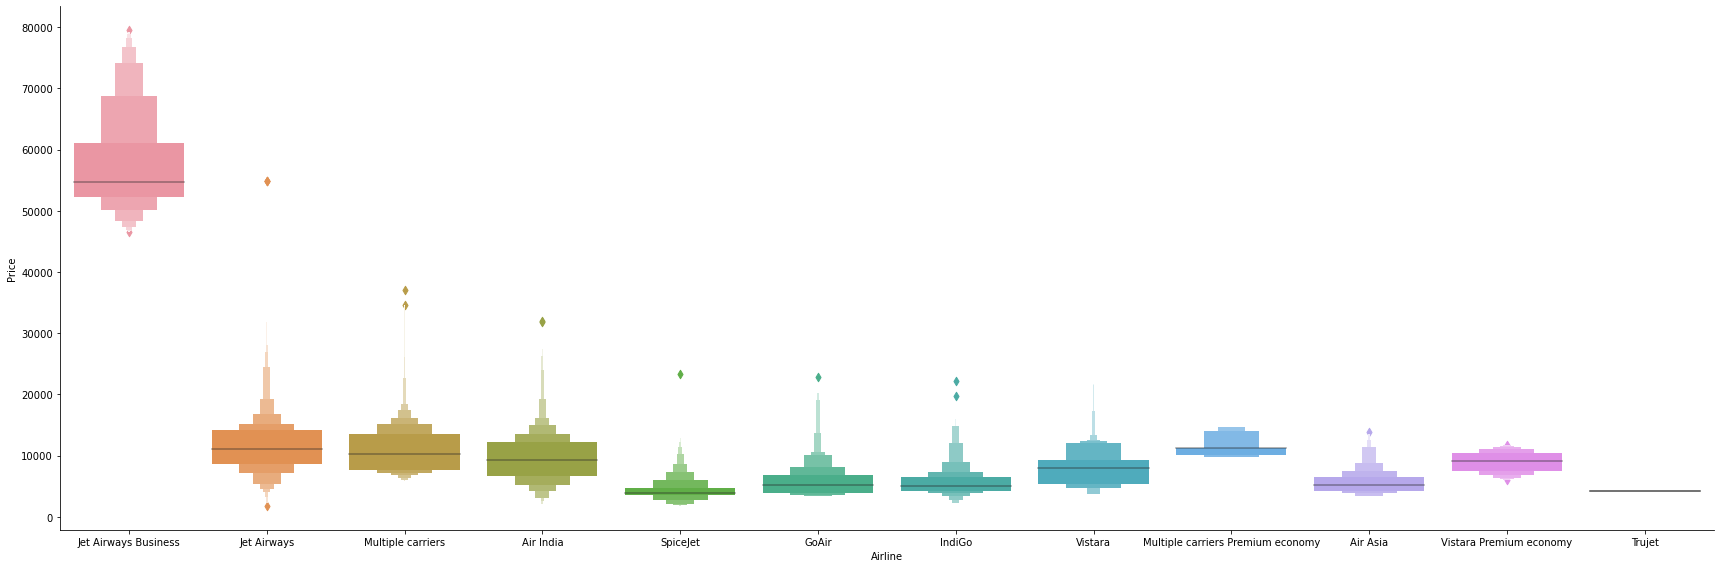

In [24]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

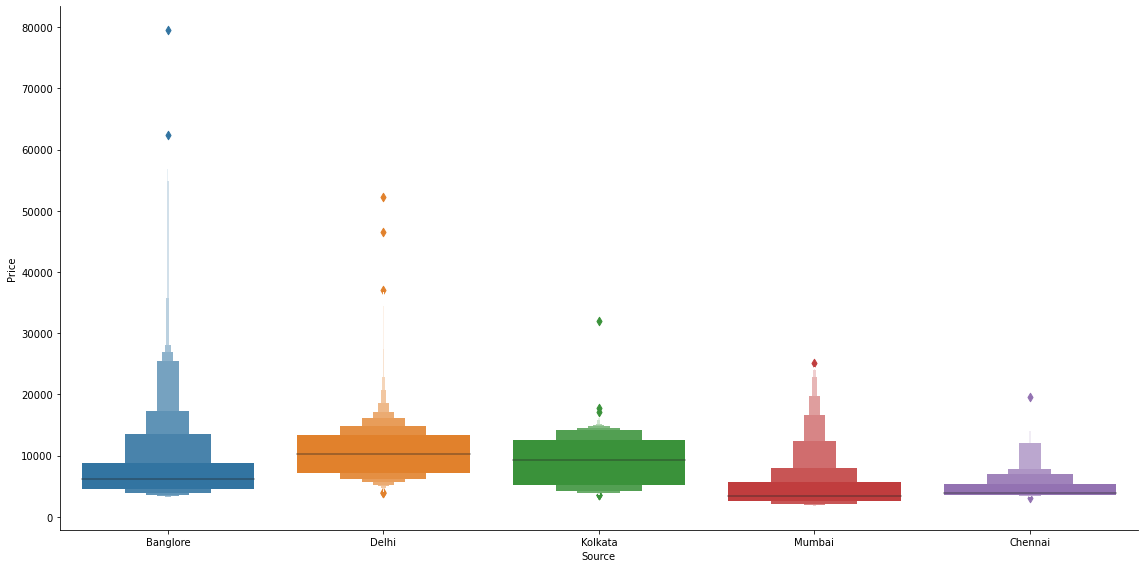

In [25]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 2)
plt.show()

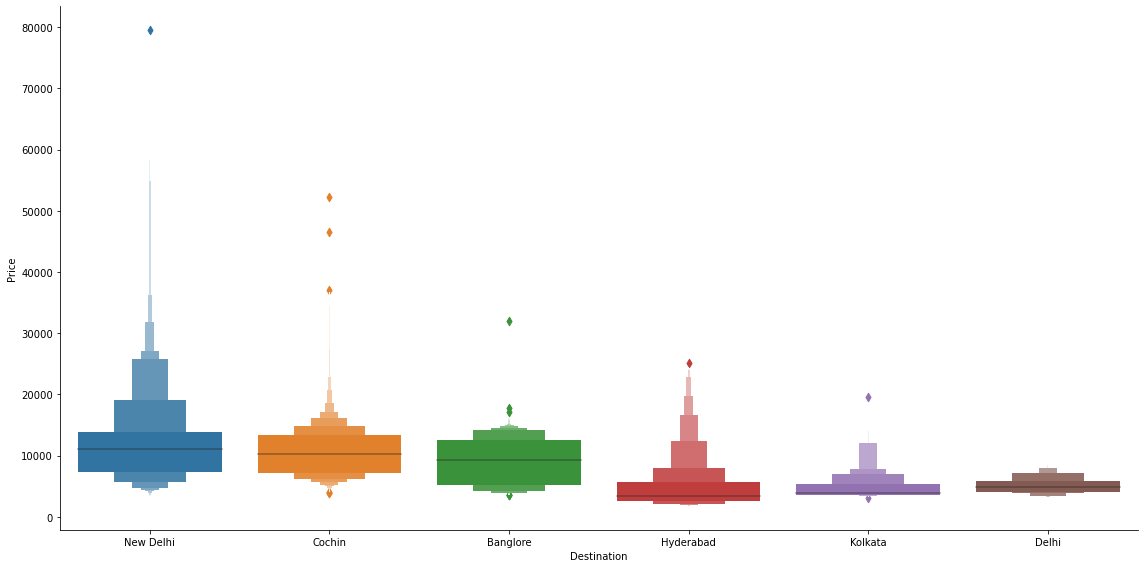

In [26]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 2)
plt.show()

In [27]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [28]:
# Date_of_Journey
df["Journey_day"] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df["Journey_month"] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [29]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [30]:
df['Duration'] = df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


In [31]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']

print('Number of categorical variables: ', len(categorical_features))
print(categorical_features)
df[categorical_features].head()

Number of categorical variables:  6
['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [32]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
print(numerical_features)
# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  8
['Duration', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min']


,Duration,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,170,3897,24,3,22,20,1,10
1,445,7662,1,5,5,50,13,15
2,1140,13882,9,6,9,25,4,25
3,325,6218,12,5,18,5,23,30
4,285,13302,1,3,16,50,21,35


In [33]:
for i in categorical_features:
    print(i,len(df[i].unique()),df[i].unique())
    print("-"*100)

Airline 12 ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
----------------------------------------------------------------------------------------------------
Source 5 ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
----------------------------------------------------------------------------------------------------
Destination 6 ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
----------------------------------------------------------------------------------------------------
Route 128 ['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'
 'DEL → BOM → COK' 'DEL → BLR → COK' 'MAA → CCU' 'CCU → BOM → BLR'
 'DEL → AMD → BOM → COK' 'DEL → PNQ → COK' 'DEL → CCU → BOM → COK'
 'BLR → COK → DEL' 'DEL → IDR → BOM → COK' 'DEL → LKO → COK'
 'CCU → GAU → DEL → BLR

In [34]:
for i in categorical_features:
    print(i,df[i].value_counts())
    print("-"*100)

Airline Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
----------------------------------------------------------------------------------------------------
Source Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64
----------------------------------------------------------------------------------------------------
Destination Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, 

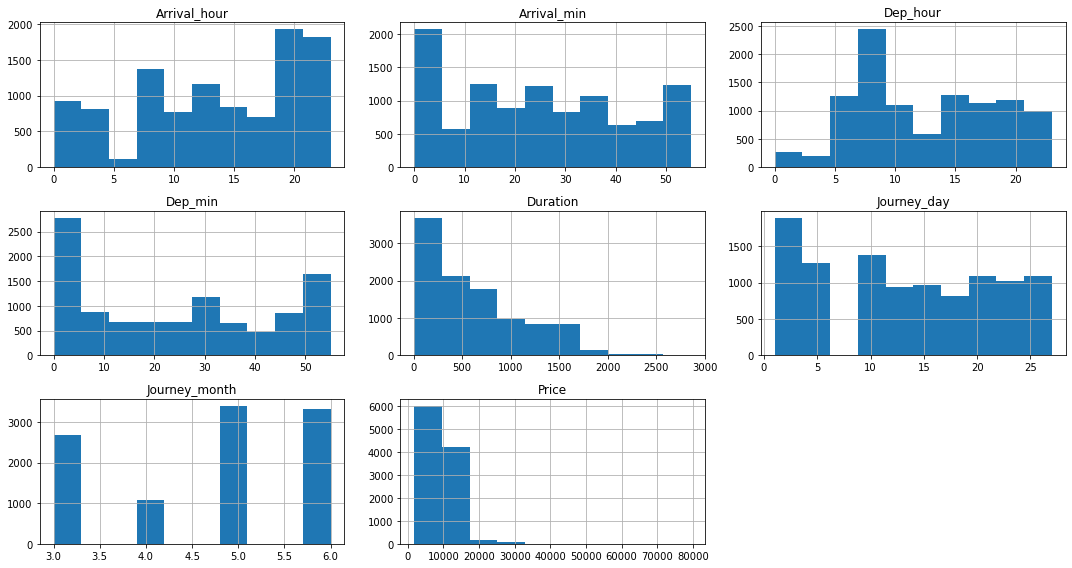

In [35]:
fig = df.hist(figsize=(15,8))
plt.tight_layout()
plt.show()

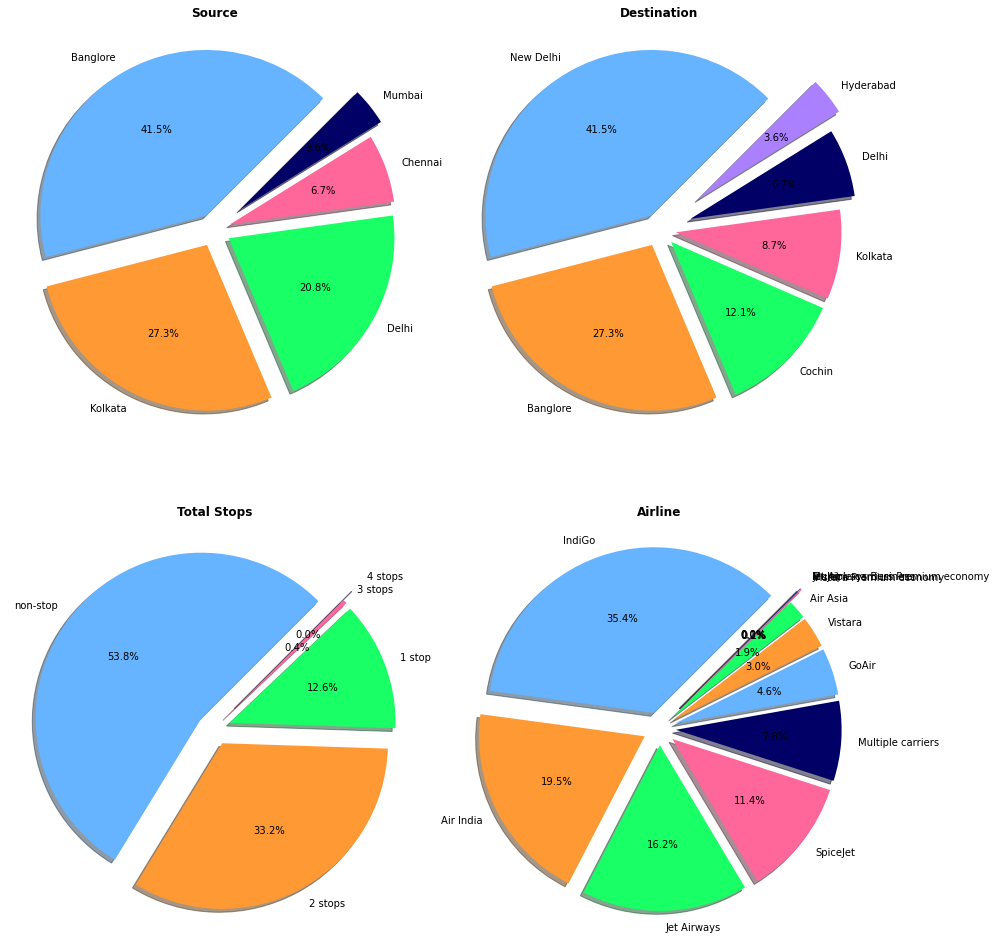

In [36]:
fig, ax = plt.subplots(2,2, figsize = (14,14))
((ax1, ax2), (ax3, ax4)) = ax

labels = ['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']
values = df['Source'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#FF9933','#19FF66','#FF6699','#000066'],shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.1, 0.2])
ax1.set_title("Source", fontdict={'fontsize': 12},fontweight ='bold')

labels = ['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad']
values = df['Destination'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#FF9933','#19FF66','#FF6699','#000066','#AA80FF'],shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.1, 0.2,0.3])
ax2.set_title("Destination", fontdict={'fontsize': 12},fontweight ='bold')

labels = ['non-stop', '2 stops', '1 stop', '3 stops', '4 stops']
values = df['Total_Stops'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#FF9933','#19FF66','#FF6699','#000066'],shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.1, 0.2])
ax3.set_title("Total Stops", fontdict={'fontsize': 12},fontweight ='bold')

labels = ['IndiGo','Air India', 'Jet Airways', 'SpiceJet', 'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Vistara Premium economy', 'Jet Airways Business', 'Multiple carriers Premium economy', 'Trujet']
values = df['Airline'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#FF9933','#19FF66','#FF6699','#000066'],shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2,0.2,0.2])
ax4.set_title("Airline", fontdict={'fontsize': 12},fontweight ='bold')

plt.tight_layout()
plt.show()

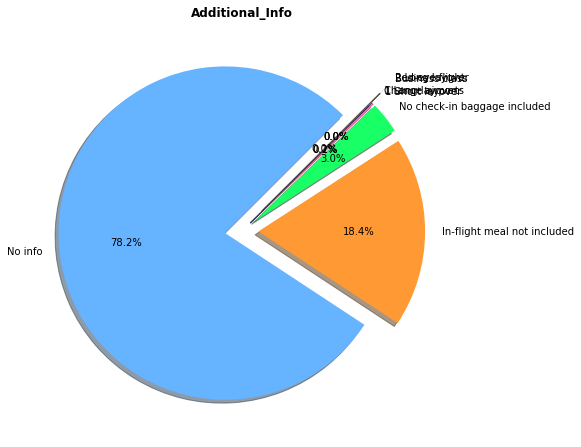

In [37]:
fig, ax = plt.subplots(figsize = (8,8))
labels = ['No info', 'In-flight meal not included', 'No check-in baggage included', '1 Short layover', '1 Long layover', 'Change airports', 'Business class', 'Red-eye flight', '2 Long layover']
values = df['Additional_Info'].value_counts().tolist()
ax.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#FF9933','#19FF66','#FF6699','#000066'],shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.2])
ax.set_title("Additional_Info", fontdict={'fontsize': 12},fontweight ='bold')
plt.tight_layout()
plt.show()

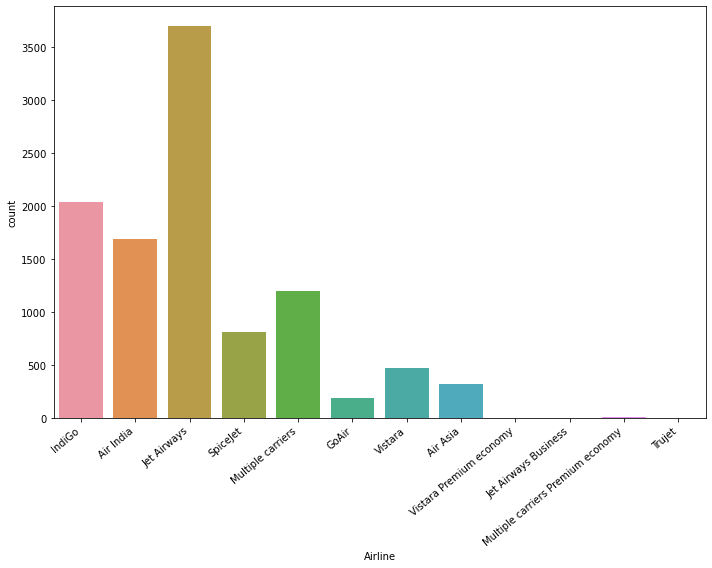

----------------------------------------------------------------------------------------------------


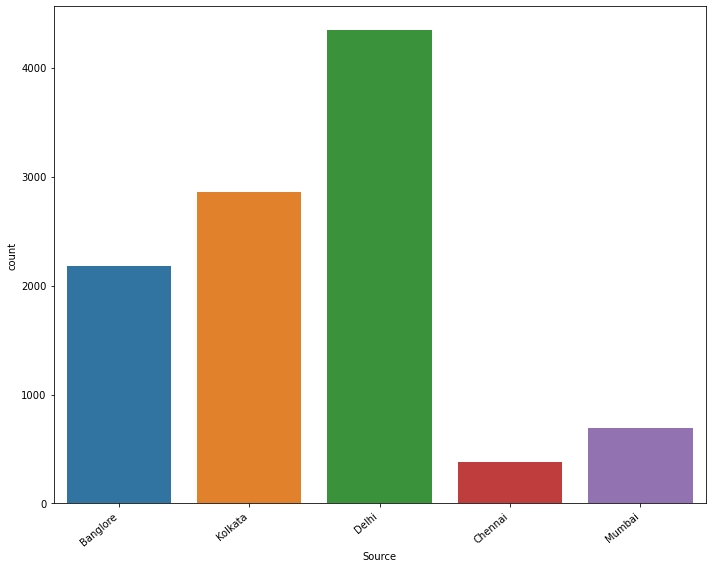

----------------------------------------------------------------------------------------------------


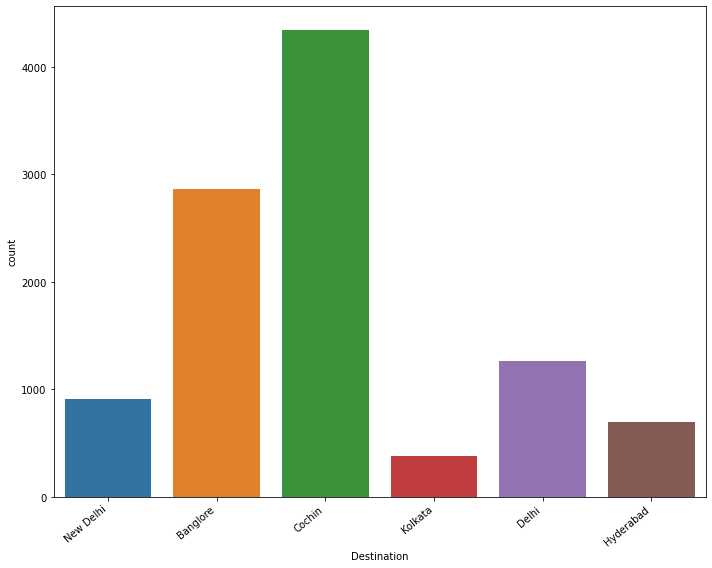

----------------------------------------------------------------------------------------------------


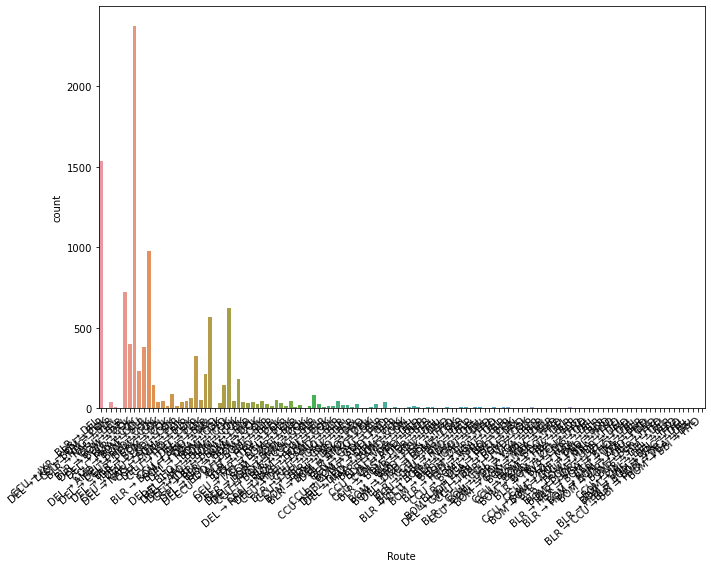

----------------------------------------------------------------------------------------------------


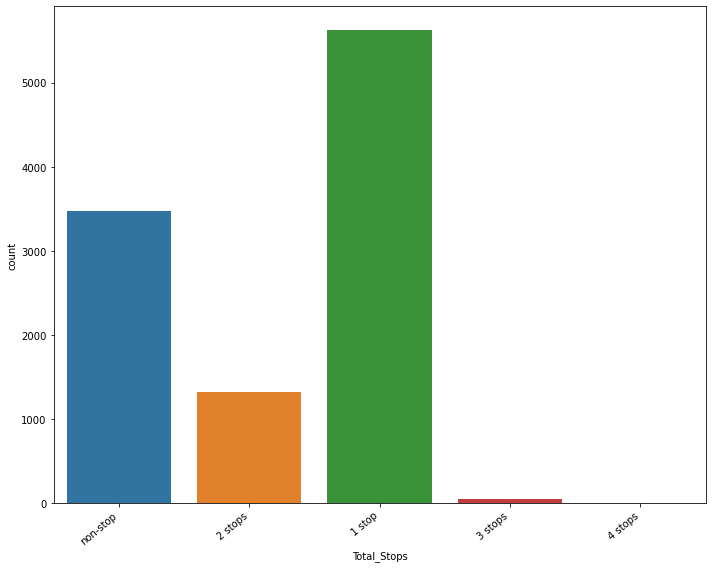

----------------------------------------------------------------------------------------------------


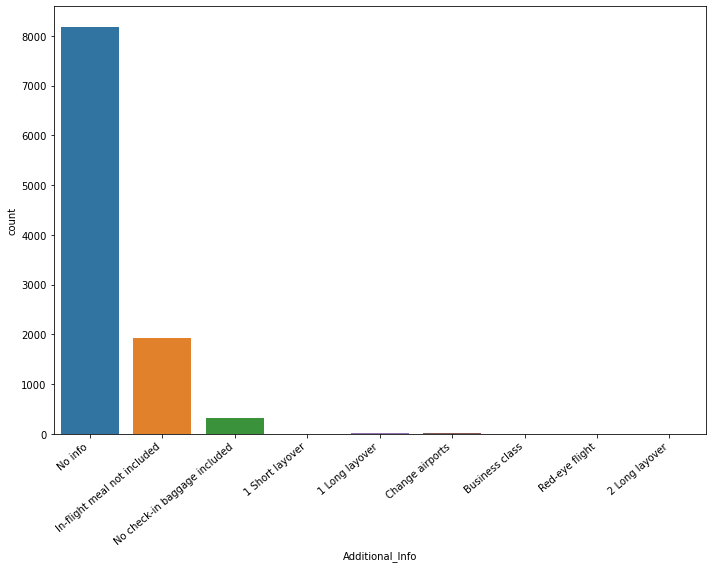

----------------------------------------------------------------------------------------------------


In [38]:
for i in categorical_features:
    plt.figure(figsize=(10,8))
    ax = sns.countplot(x=i, data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()
    print("-"*100)

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

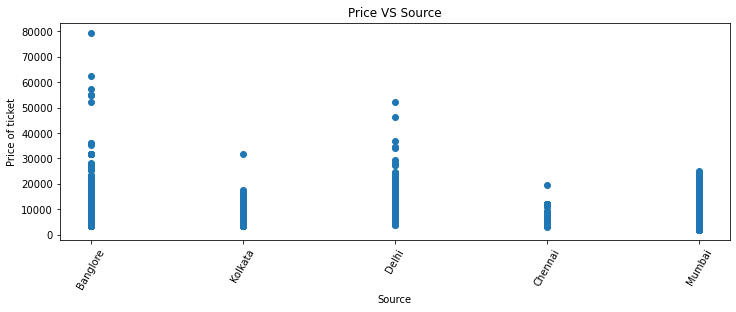

In [39]:
# Plotting Ticket Prices VS Source
plt.figure(figsize = (12,4))
plt.title('Price VS Source')
plt.scatter(df['Source'], df['Price'])
plt.xticks
plt.xlabel('Source')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 60)

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

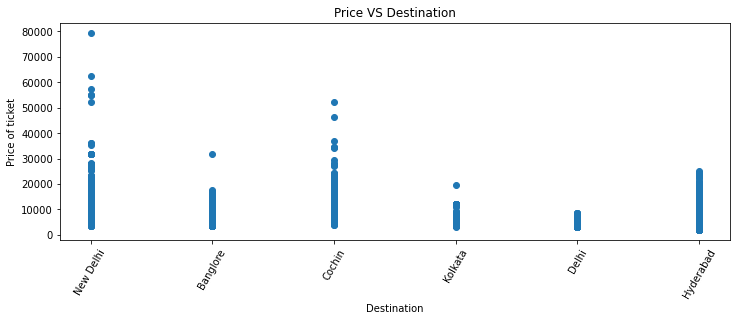

In [40]:
# Plotting Ticket Prices VS Destination
plt.figure(figsize = (12,4))
plt.title('Price VS Destination')
plt.scatter(df['Destination'], df['Price'])
plt.xticks
plt.xlabel('Destination')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 60)

Text(0, 0.5, 'Price of ticket')

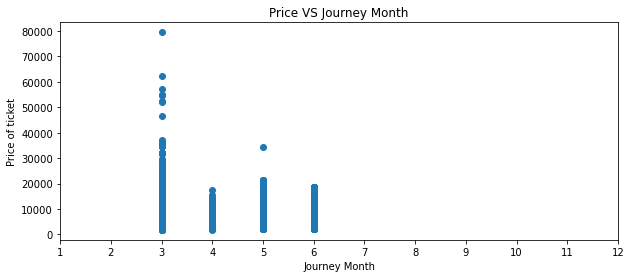

In [41]:
# Plotting Ticket Prices VS Journey Month
plt.figure(figsize = (10,4))
plt.title('Price VS Journey Month')
plt.scatter(df['Journey_month'], df['Price'])
plt.xticks(np.arange(1, 13, 1.0))
plt.xlabel('Journey Month')
plt.ylabel('Price of ticket')

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

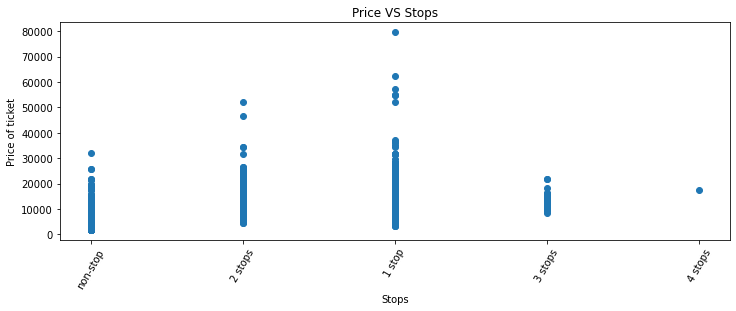

In [42]:
# Plotting Ticket Prices VS Stops
plt.figure(figsize = (12,4))
plt.title('Price VS Stops')
plt.scatter(df['Total_Stops'], df['Price'])
plt.xlabel('Stops')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 60)

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

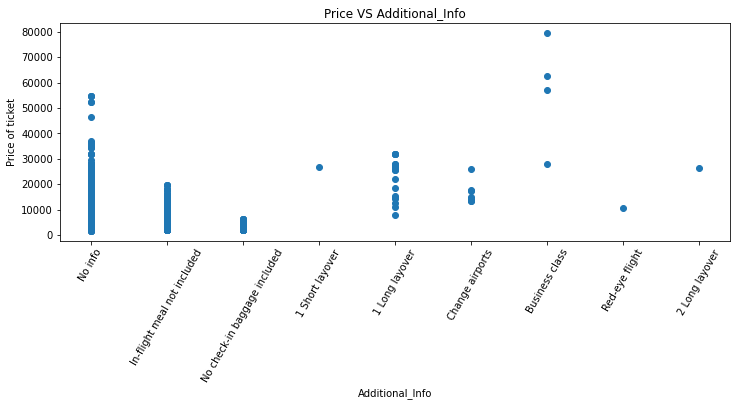

In [43]:
# Plotting Ticket Prices VS Additional_Info
plt.figure(figsize = (12,4))
plt.title('Price VS Additional_Info')
plt.scatter(df['Additional_Info'], df['Price'])
plt.xlabel('Additional_Info')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 60)

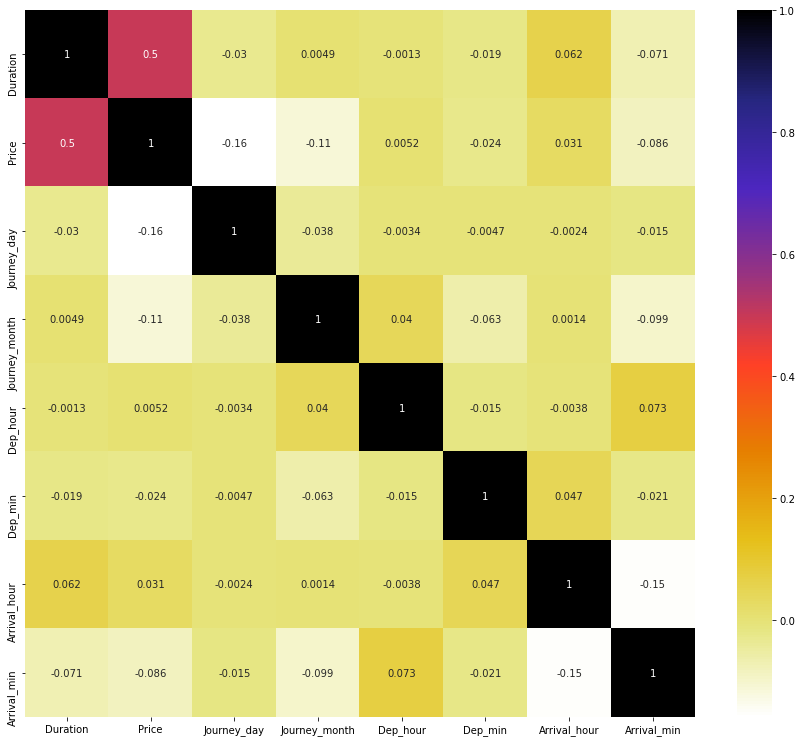

In [44]:
plt.figure(figsize=(15,13))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [45]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [46]:
corr_features = correlation(df, 0.80)
len(set(corr_features))

0

In [47]:
#Performing OneHotEncoding for Nominal Categorical Data

def OneHotEncoding(df,feature):
    feat = df[[feature]]
    feat = pd.get_dummies(feat, drop_first= True)
    feat=pd.DataFrame(feat)
    df = pd.concat([df, feat], axis = 1)
    df.drop([feature], axis = 1, inplace = True)
    return df

In [48]:
df=OneHotEncoding(df,"Airline")
df=OneHotEncoding(df,"Source")
df=OneHotEncoding(df,"Destination")

In [49]:
df.head()

,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [51]:
df.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,non-stop,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,445,2 stops,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1140,2 stops,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,325,1 stop,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,285,1 stop,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [52]:
# As this is case of Ordinal Categorical type we perform LabelEncoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Total_Stops"]=encoder.fit_transform(df["Total_Stops"])
df.head()

,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,4,3897,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,445,1,7662,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1140,1,13882,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,325,0,6218,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,285,0,13302,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
col=[i for i in df.columns]
print(col)

['Duration', 'Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi']


<ipython-input-54-bc01d5dd8f9d>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10, 5))


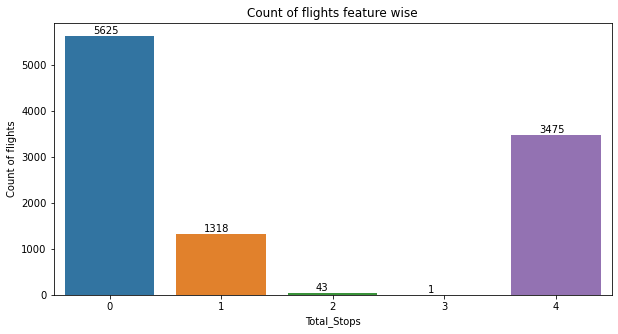

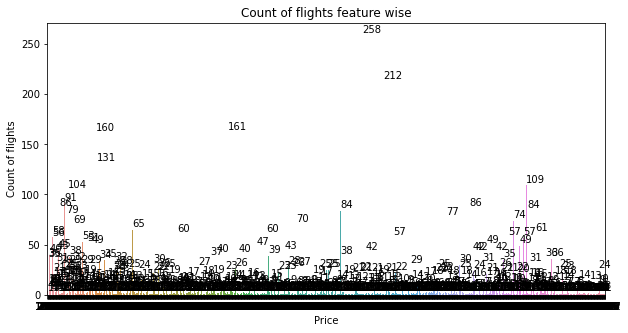

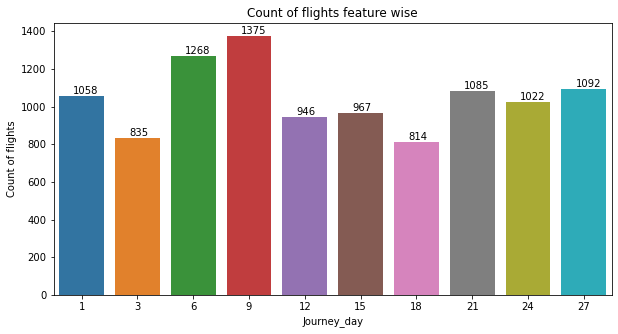

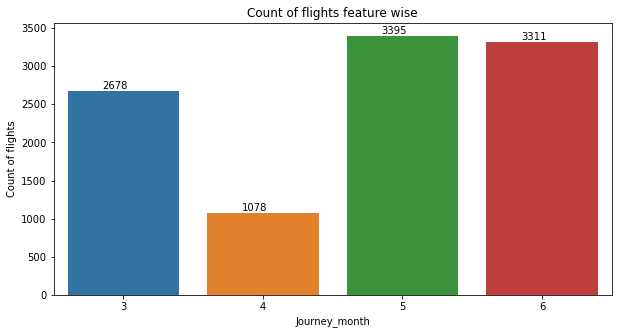

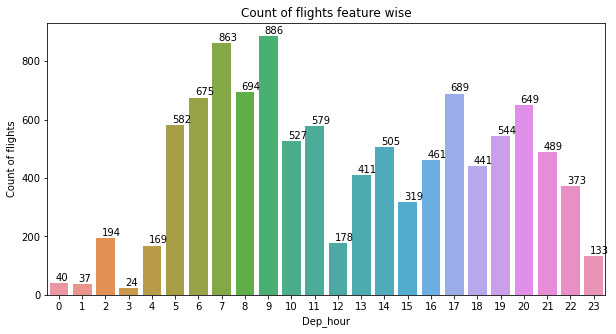

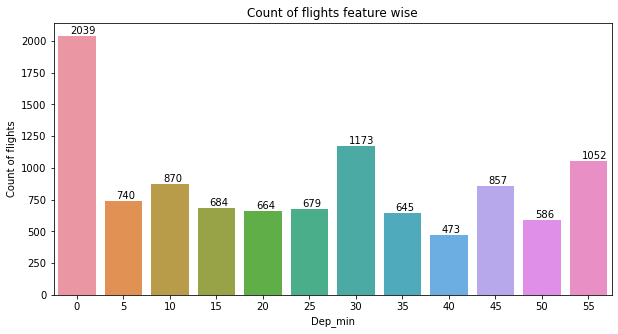

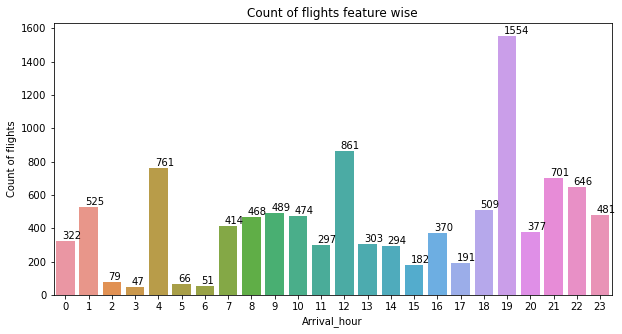

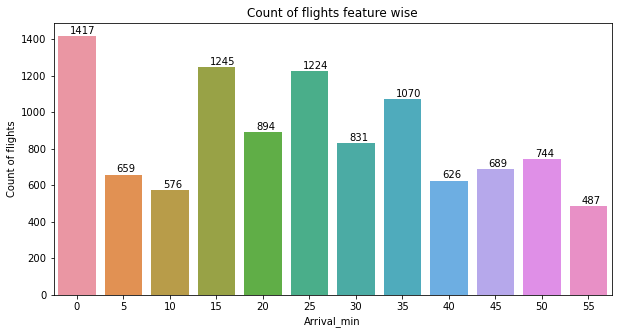

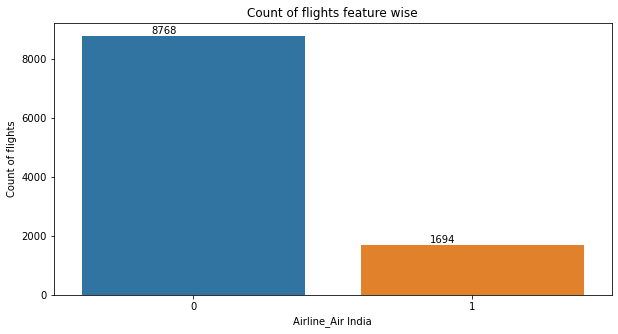

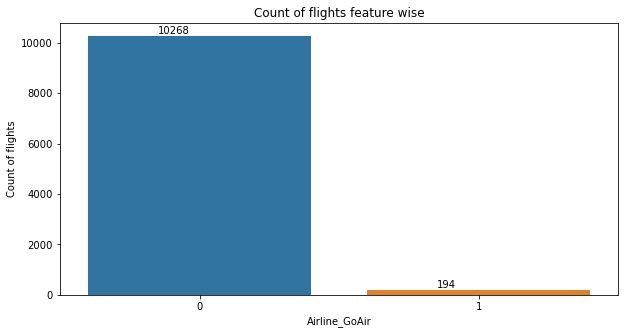

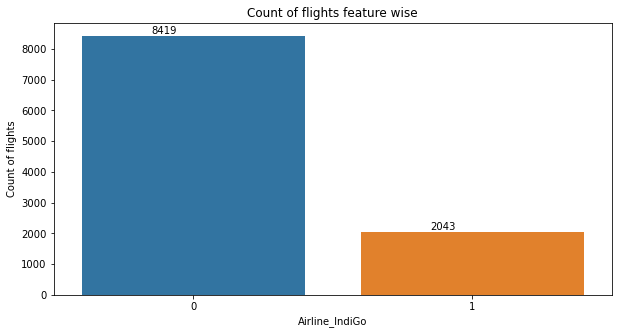

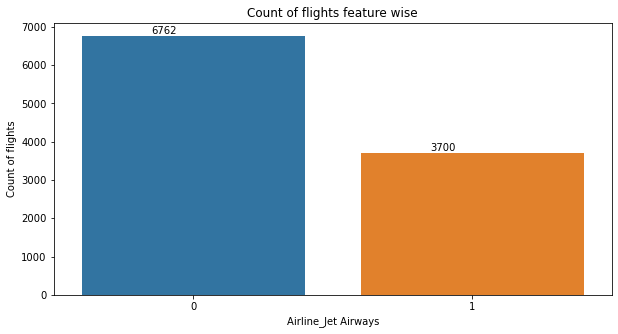

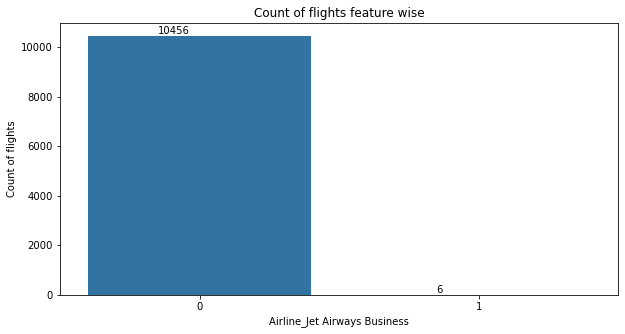

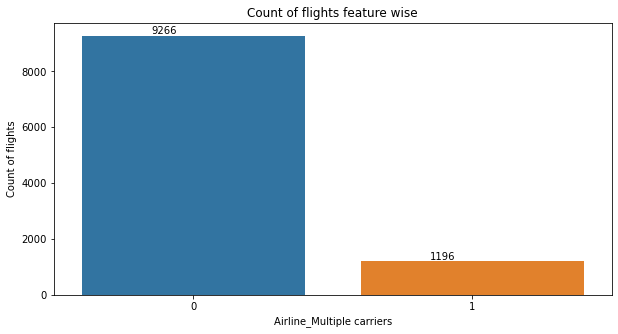

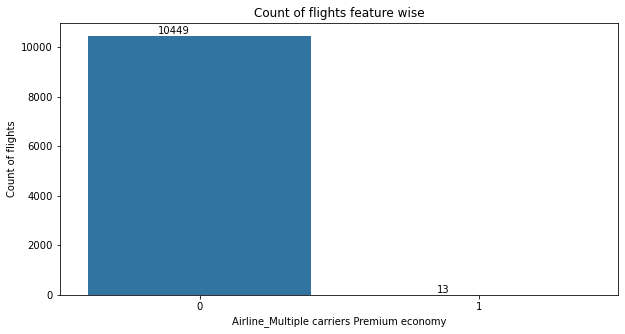

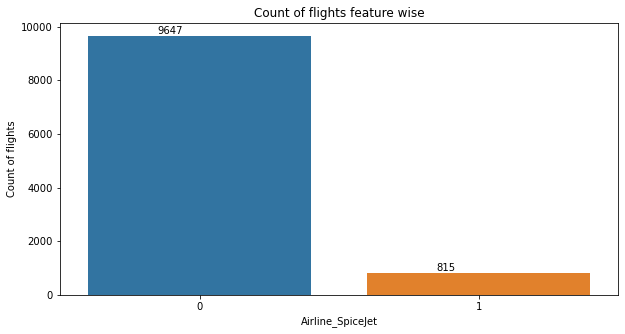

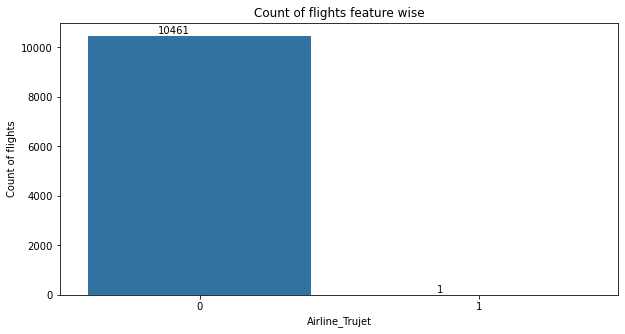

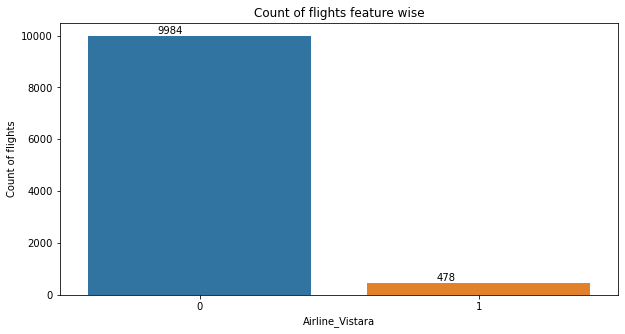

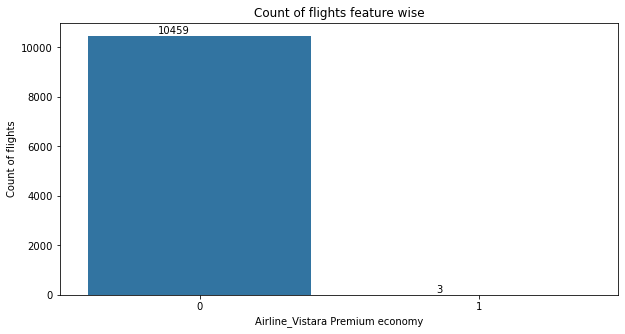

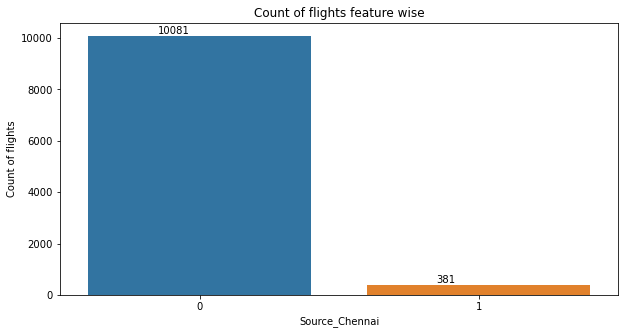

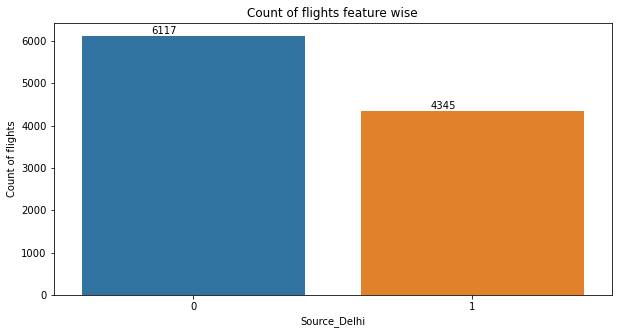

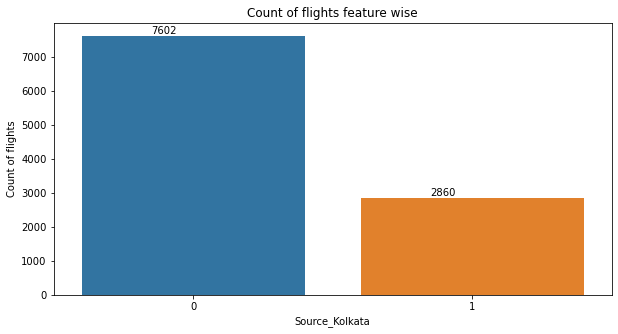

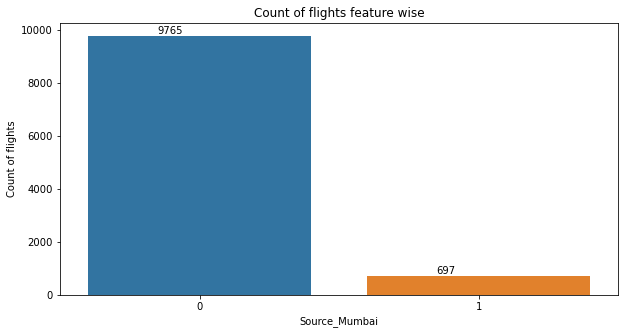

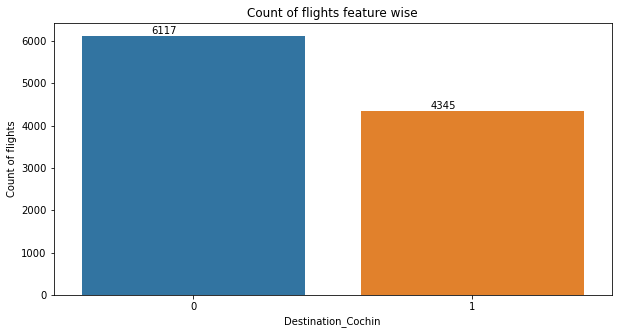

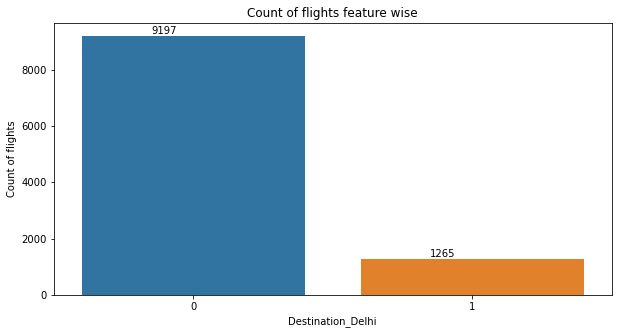

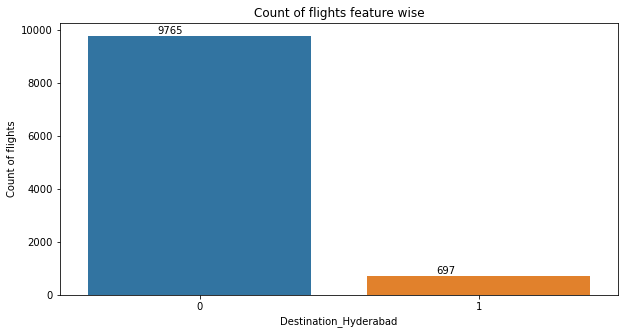

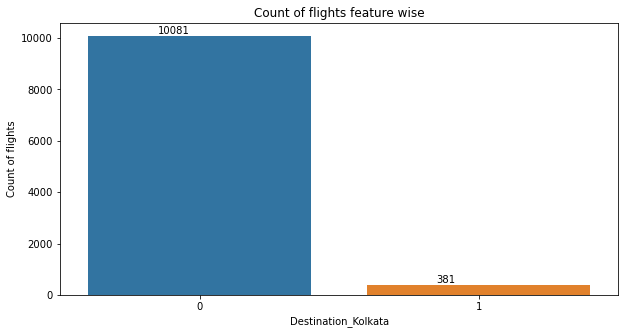

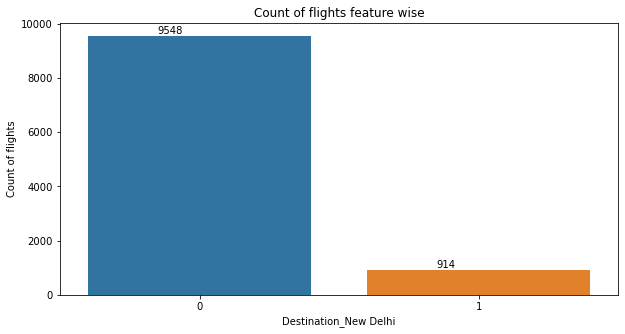

In [54]:
for i in range(1,len(col)):
    plt.figure(figsize = (10, 5))
    plt.title('Count of flights feature wise')
    ax=sns.countplot(x = col[i], data = df)
    plt.xlabel(col[i])
    plt.ylabel('Count of flights')
    for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

In [55]:
df.rename(columns = {'Airline_Jet Airways':'Airline_Jet_Airways','Airline_Jet Airways Business':'Airline_Jet_Airways_Business','Airline_Multiple carriers':'Airline_Multiple_carriers','Airline_Multiple carriers Premium economy':'Airline_Multiple_carriers_Premium_economy','Airline_Vistara Premium economy':'Airline_Vistara_Premium_economy','Airline_Air India':'Airline_Air_India','Destination_New Delhi':'Destination_New_Delhi'}, inplace = True)

In [56]:
df_std=df.drop("Price",axis=1)
df_y=df["Price"]
df_std.head()

,Duration,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air_India,Airline_GoAir,Airline_IndiGo,Airline_Jet_Airways,Airline_Jet_Airways_Business,Airline_Multiple_carriers,Airline_Multiple_carriers_Premium_economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara_Premium_economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New_Delhi
0,170,4,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,445,1,1,5,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1140,1,9,6,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,325,0,12,5,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,285,0,1,3,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [57]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(df_std, df_y)

ExtraTreesRegressor()

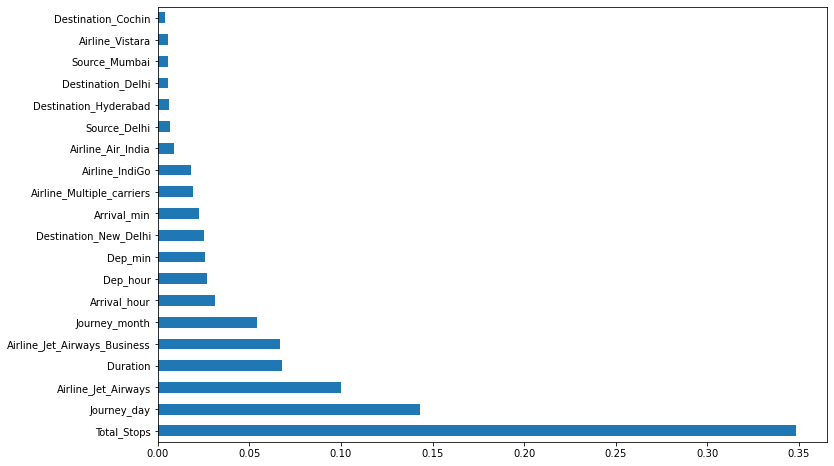

In [58]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=df_std.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [59]:
X_train, X_val, y_train, y_val = train_test_split(df_std,df_y,test_size=0.25,random_state=0)

In [60]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print("The size of testing input is", X_val.shape)
print("The size of testing output is", y_val.shape)

The size of training input is (7846, 28)
The size of training output is (7846,)
The size of testing input is (2616, 28)
The size of testing output is (2616,)


In [61]:
regs = [
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    LinearRegression(),
    LGBMRegressor(),
    XGBRegressor()
]
reg_names = [
    "Ridge",
    "Lasso",
    "Decision Tree Regressor",
    "Random Forest Regressor",
    "Linear Regression",
    "LGBM Regressor",
    "XGB Regressor",
]

In [62]:
scores = np.zeros(len(regs))

In [63]:
for i in np.arange(len(regs)):
    print(reg_names[i])
    scores[i] = np.mean(cross_validate(regs[i], X_train, y_train, scoring='neg_mean_absolute_error', cv=5, return_train_score=False)["test_score"])

Ridge
Lasso
Decision Tree Regressor
Random Forest Regressor
Linear Regression
LGBM Regressor
XGB Regressor


#### Higher the Negative MAE, better is the model

In [64]:
pd.DataFrame(scores, index=reg_names, columns=["Score"])

,Score
Ridge,-2084.250966
Lasso,-2081.267577
Decision Tree Regressor,-1403.576533
Random Forest Regressor,-1211.115411
Linear Regression,-2080.470463
LGBM Regressor,-1297.920191
XGB Regressor,-1197.898258


#### The larger the R2 score, the better the regression model fits our observations.

Ridge()
Root Mean Squared Error:  3061.4033218510654
R-Squared:  55.80513506331188


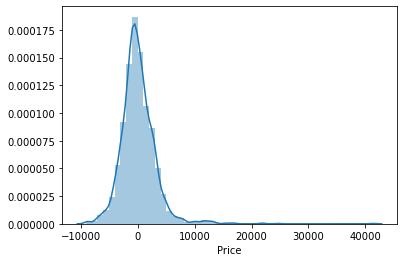

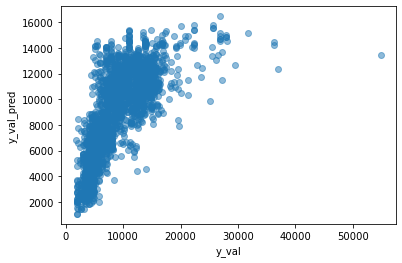

----------------------------------------------------------------------------------------------------
Lasso()
Root Mean Squared Error:  3062.726261385608
R-Squared:  55.76693051412447


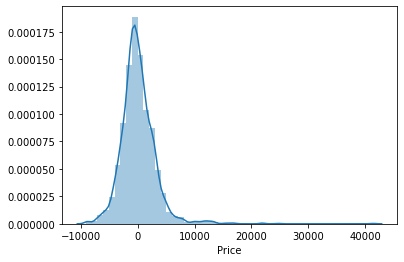

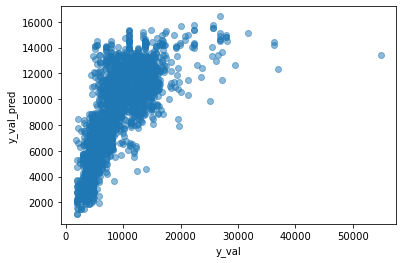

----------------------------------------------------------------------------------------------------
DecisionTreeRegressor()
Root Mean Squared Error:  2683.4637627478255
R-Squared:  66.04355762897973


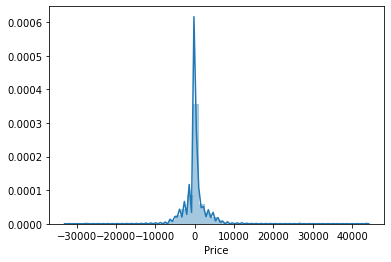

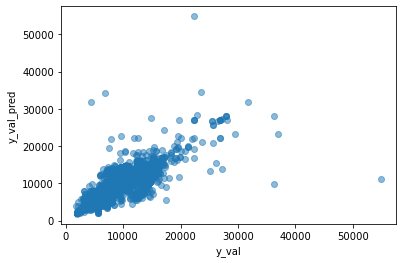

----------------------------------------------------------------------------------------------------
RandomForestRegressor()
Root Mean Squared Error:  2037.4887751762913
R-Squared:  80.42412593604922


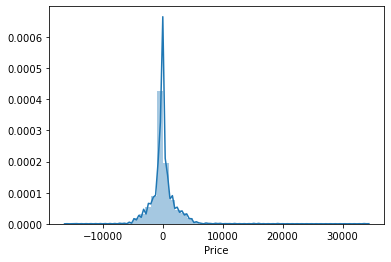

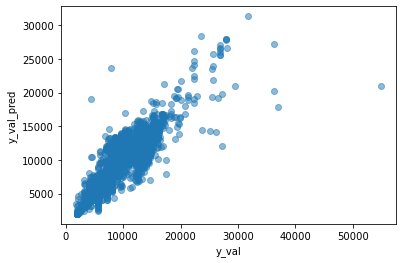

----------------------------------------------------------------------------------------------------
LinearRegression()
Root Mean Squared Error:  3061.875333945508
R-Squared:  55.79150594181257


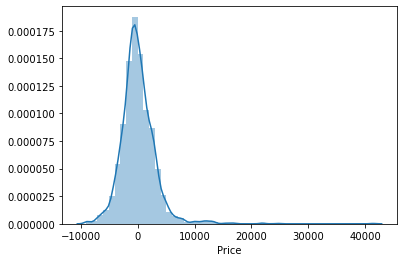

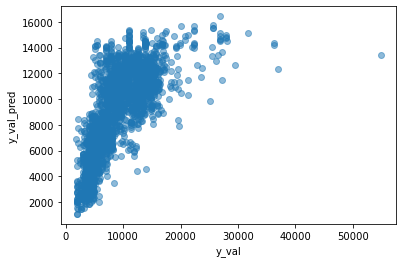

----------------------------------------------------------------------------------------------------
LGBMRegressor()
Root Mean Squared Error:  1953.9802644448757
R-Squared:  81.99591483223966


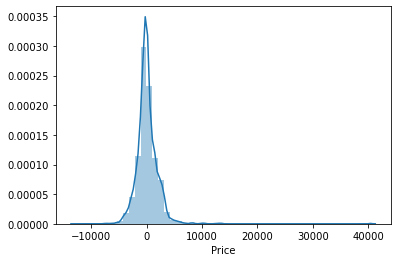

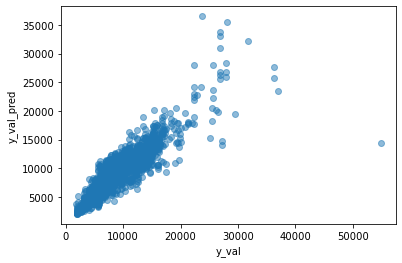

----------------------------------------------------------------------------------------------------
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Root Mean Squared Error:  1928.1773496062208
R-Squared:  82.46827432263801


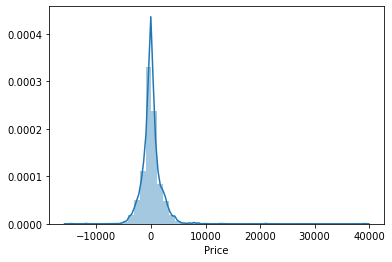

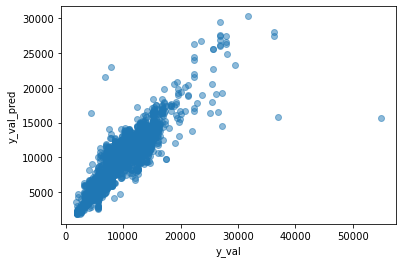

----------------------------------------------------------------------------------------------------


In [65]:
for mod in regs:
    reg = mod
    reg.fit(X_train, y_train)
    y_val_pred = reg.predict(X_val)
    print(mod)
    print("Root Mean Squared Error: ", sqrt(mse(y_val, y_val_pred)))
    print("R-Squared: ", r2_score(y_val, y_val_pred)*100)
    sns.distplot(y_val-y_val_pred)
    plt.show()
    plt.scatter(y_val, y_val_pred, alpha = 0.5)
    plt.xlabel("y_val")
    plt.ylabel("y_val_pred")
    plt.show()
    print("-"*100)

###### By comparing all the models listed above, we can conclude that Decision Tree Regressor, Random Forest Regressor, LGBM Regressor and XGB Regressor performs the best (with their default parameters).

# Decision Tree Regressor

In [66]:
# Performing GridSearchCV on Decision Tree Regression
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
dtr = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
dtr.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [67]:
y_train_pred = dtr.predict(X_train)
y_val_pred = dtr.predict(X_val)

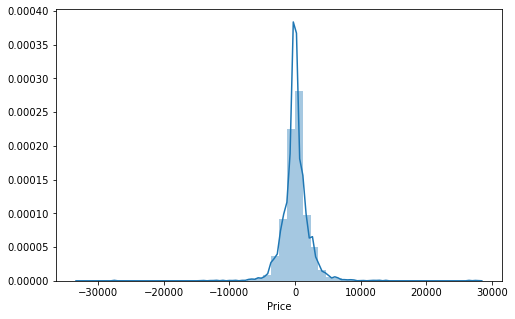

In [68]:
plt.figure(figsize = (8,5))
sns.distplot(y_val-y_val_pred)
plt.show()

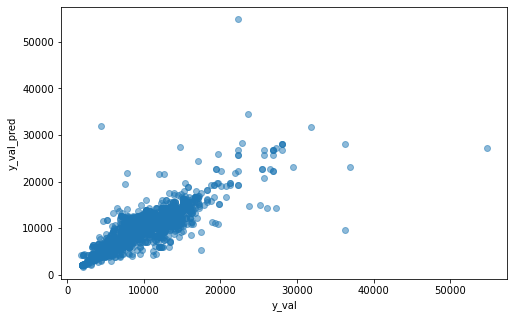

In [69]:
plt.figure(figsize = (8,5))
plt.scatter(y_val, y_val_pred, alpha = 0.5)
plt.xlabel("y_val")
plt.ylabel("y_val_pred")
plt.show()

In [70]:
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred)*100)

Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  1455.80111052311
R-Squared:  90.1179533004606


In [71]:
print("Test Results for Decision Tree Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_val, y_val_pred)))
print("R-Squared: ", r2_score(y_val, y_val_pred)*100)

Test Results for Decision Tree Regressor Model:
Root Mean Squared Error:  2240.9170872969908
R-Squared:  76.31996777107433


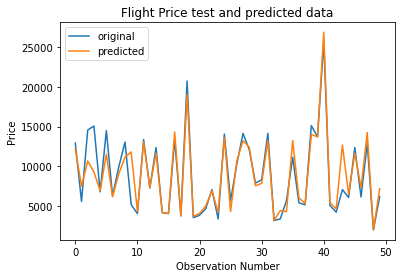

In [72]:
num=50
x_ax=range(len(y_val[:num]))
plt.plot(x_ax,y_val[:num],label="original")
plt.plot(x_ax,y_val_pred[:num],label="predicted")
plt.title("Flight Price test and predicted data")
plt.xlabel("Observation Number")
plt.ylabel('Price')
plt.legend()
plt.show()

# Random Forest Regressor

In [73]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [74]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [75]:
rfr = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = param_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rfr.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [76]:
rfr.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [77]:
y_train_pred = rfr.predict(X_train)
y_val_pred = rfr.predict(X_val)

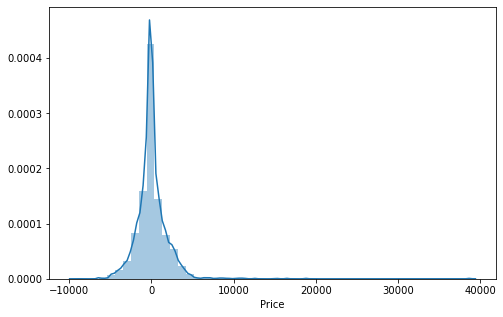

In [78]:
plt.figure(figsize = (8,5))
sns.distplot(y_val-y_val_pred)
plt.show()

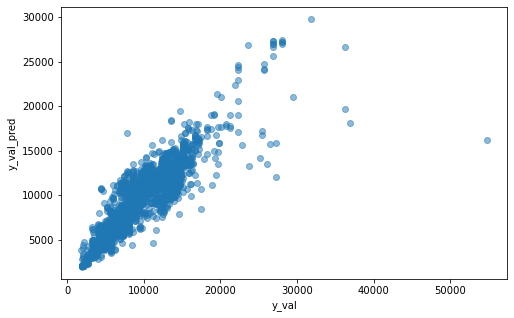

In [79]:
plt.figure(figsize = (8,5))
plt.scatter(y_val, y_val_pred, alpha = 0.5)
plt.xlabel("y_val")
plt.ylabel("y_val_pred")
plt.show()

In [80]:
print("Train Results for Random Forest Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred)*100)

Train Results for Random Forest Regressor Model:
Root Mean squared Error:  1479.881831567034
R-Squared:  89.78832731183265


In [81]:
print("Test Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_val, y_val_pred)))
print("R-Squared: ", r2_score(y_val, y_val_pred)*100)

Test Results for Random Forest Regressor Model:
Root Mean Squared Error:  1973.7091392951702
R-Squared:  81.63051346526173


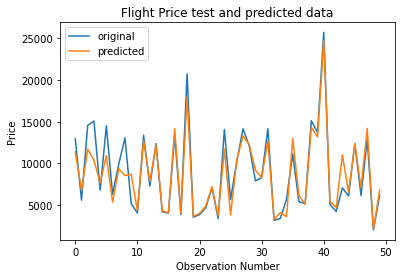

In [82]:
num=50
x_ax=range(len(y_val[:num]))
plt.plot(x_ax,y_val[:num],label="original")
plt.plot(x_ax,y_val_pred[:num],label="predicted")
plt.title("Flight Price test and predicted data")
plt.xlabel("Observation Number")
plt.ylabel('Price')
plt.legend()
plt.show()

# LGBM Regressor

In [83]:
from scipy.stats import uniform
params = {'learning_rate': uniform(0, 1),
          'n_estimators': sp_randint(200, 1500),
          'num_leaves': sp_randint(20, 200),
          'max_depth': sp_randint(2, 15),
          'min_child_weight': uniform(0, 2),
          'colsample_bytree': uniform(0, 1),
         }

In [84]:
lgb_random = RandomizedSearchCV(LGBMRegressor(), param_distributions=params, n_iter=10, cv=3, random_state=42, scoring='neg_root_mean_squared_error', verbose=10, return_train_score=True)

In [85]:
lgb_random = lgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244, num_leaves=122
[CV 1/3; 1/10] END colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244, num_leaves=122;, score=(train=-628.256, test=-2736.168) total time=   2.8s
[CV 2/3; 1/10] START colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244, num_leaves=122
[CV 2/3; 1/10] END colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244, num_leaves=122;, score=(train=-623.504, test=-2761.026) total time=   3.1s
[CV 3/3; 1/10] START colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child

In [86]:
best_params = lgb_random.best_params_
print(best_params)

{'colsample_bytree': 0.44583275285359114, 'learning_rate': 0.09997491581800289, 'max_depth': 12, 'min_child_weight': 1.7323522915498704, 'n_estimators': 1323, 'num_leaves': 123}


In [87]:
y_train_pred = lgb_random.predict(X_train)
y_val_pred = lgb_random.predict(X_val)

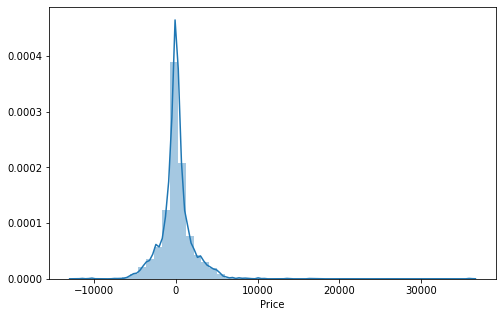

In [88]:
plt.figure(figsize = (8,5))
sns.distplot(y_val-y_val_pred)
plt.show()

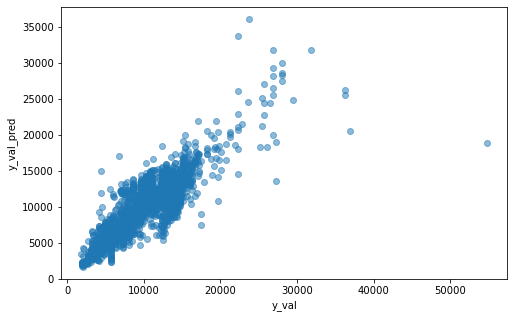

In [89]:
plt.figure(figsize = (8,5))
plt.scatter(y_val, y_val_pred, alpha = 0.5)
plt.xlabel("y_val")
plt.ylabel("y_val_pred")
plt.show()

In [90]:
print("Train Results for LGBM Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred)*100)

Train Results for LGBM Regressor Model:
Root Mean squared Error:  892.469375105314
R-Squared:  96.28610643022647


In [91]:
print("Test Results for LGBM Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_val, y_val_pred)))
print("R-Squared: ", r2_score(y_val, y_val_pred)*100)

Test Results for LGBM Regressor Model:
Root Mean Squared Error:  2062.215822571823
R-Squared:  79.94609551085946


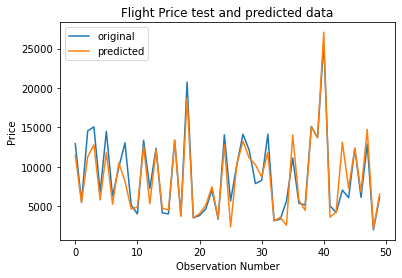

In [92]:
num=50
x_ax=range(len(y_val[:num]))
plt.plot(x_ax,y_val[:num],label="original")
plt.plot(x_ax,y_val_pred[:num],label="predicted")
plt.title("Flight Price test and predicted data")
plt.xlabel("Observation Number")
plt.ylabel('Price')
plt.legend()
plt.show()

# XGB Regressor

In [93]:
params = {'learning_rate': uniform(0, 1),
          'n_estimators': sp_randint(200, 1500),
          'max_depth': sp_randint(2, 15),
          'min_child_weight': uniform(0, 2),
          'colsample_bytree': uniform(0, 1),
         }

In [94]:
xgb_random = RandomizedSearchCV(XGBRegressor(), param_distributions=params, n_iter=10, cv=3, random_state=42, scoring='neg_root_mean_squared_error', verbose=10, return_train_score=True)

In [95]:
xgb_random = xgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244
[CV 1/3; 1/10] END colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244;, score=(train=-625.506, test=-2737.094) total time=  11.1s
[CV 2/3; 1/10] START colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244
[CV 2/3; 1/10] END colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244;, score=(train=-620.280, test=-2556.703) total time=  10.2s
[CV 3/3; 1/10] START colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244
[CV 3/3; 1/10] END

In [96]:
best_params = xgb_random.best_params_
print(best_params)

{'colsample_bytree': 0.5924145688620425, 'learning_rate': 0.046450412719997725, 'max_depth': 4, 'min_child_weight': 1.3606150771755594, 'n_estimators': 1040}


In [97]:
y_train_pred = xgb_random.predict(X_train)
y_val_pred = xgb_random.predict(X_val)

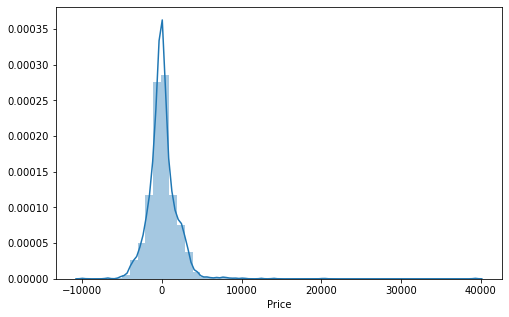

In [98]:
plt.figure(figsize = (8,5))
sns.distplot(y_val-y_val_pred)
plt.show()

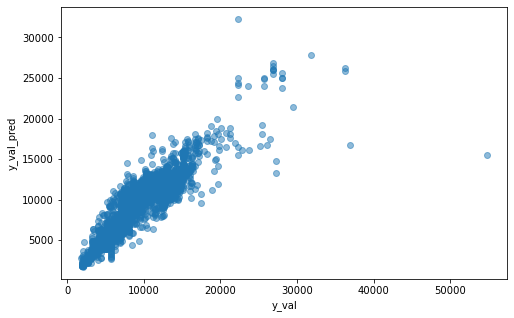

In [99]:
plt.figure(figsize = (8,5))
plt.scatter(y_val, y_val_pred, alpha = 0.5)
plt.xlabel("y_val")
plt.ylabel("y_val_pred")
plt.show()

In [100]:
print("Train Results for XGB Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred)*100)

Train Results for XGB Regressor Model:
Root Mean squared Error:  1534.9699202672914
R-Squared:  89.01392529480671


In [101]:
print("Test Results for XGB Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_val, y_val_pred)))
print("R-Squared: ", r2_score(y_val, y_val_pred)*100)

Test Results for XGB Regressor Model:
Root Mean Squared Error:  1953.1405687849099
R-Squared:  82.01138551440359


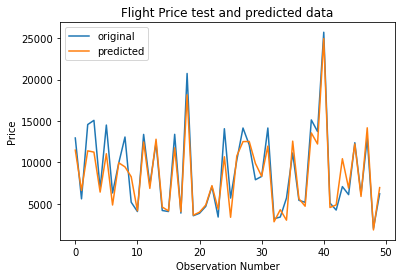

In [102]:
num=50
x_ax=range(len(y_val[:num]))
plt.plot(x_ax,y_val[:num],label="original")
plt.plot(x_ax,y_val_pred[:num],label="predicted")
plt.title("Flight Price test and predicted data")
plt.xlabel("Observation Number")
plt.ylabel('Price')
plt.legend()
plt.show()

In [103]:
dtr_score = round(dtr.score(X_train, y_train) * 100, 2)
dtr_score_test = round(dtr.score(X_val, y_val) * 100, 2)

rfr_score = round(rfr.score(X_train, y_train) * 100, 2)
rfr_score_test = round(rfr.score(X_val, y_val) * 100, 2)

lgbm_score = round(lgb_random.score(X_train, y_train) * 100, 2)
lgbm_score_test = round(lgb_random.score(X_val, y_val) * 100, 2)

xgbr_score = round(xgb_random.score(X_train, y_train) * 100, 2)
xgbr_score_test = round(xgb_random.score(X_val, y_val) * 100, 2)

In [104]:
# Comparing all the models
models = pd.DataFrame({
    'Model': [ 'Random Forest Regressor', 'LGBM Regressor','XGB Regressor','Decision Tree Regressor'],
    'Score': [ dtr_score, rfr_score, lgbm_score,xgbr_score],
    'Test Score': [ dtr_score_test, rfr_score_test, lgbm_score_test,xgbr_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
0,Random Forest Regressor,9.012000e+01,7.632000e+01
3,Decision Tree Regressor,-1.534970e+05,-1.953141e+05
2,XGB Regressor,-8.924694e+04,-2.062216e+05
1,LGBM Regressor,-2.190050e+08,-3.895528e+08


In [116]:
x = PrettyTable()
x.field_names = ["Model Name", "Tr. RMSE", "Tr. R-Squared", "Te. RMSE", "Te. R-Squared",]
x.add_row(['Decision Tree Regressor','1480.8751646292635','89.32359295988586','2050.6082679556803','75.17121421662682'])
x.add_row(['Random Forest Regressor','1020.1994631776361','95.2064826543969','1594.1167209563912','81.01685133811701'])
x.add_row(['LGBM Regressor','1320.1604989356903','91.1690057894266','1522.1802516825198','80.0739576571085'])
x.add_row(['XGB Regressor','1120.1727754058425','93.93073281857293','1599.1745831930762','83.94068970513047'])
print(x)

+-------------------------+--------------------+-------------------+--------------------+-------------------+
|        Model Name       |      Tr. RMSE      |   Tr. R-Squared   |      Te. RMSE      |   Te. R-Squared   |
+-------------------------+--------------------+-------------------+--------------------+-------------------+
| Decision Tree Regressor | 1480.8751646292635 | 89.32359295988586 | 2050.6082679556803 | 75.17121421662682 |
| Random Forest Regressor | 1020.1994631776361 |  95.2064826543969 | 1594.1167209563912 | 81.01685133811701 |
|      LGBM Regressor     | 1320.1604989356903 |  91.1690057894266 | 1522.1802516825198 |  80.0739576571085 |
|      XGB Regressor      | 1120.1727754058425 | 93.93073281857293 | 1599.1745831930762 | 83.94068970513047 |
+-------------------------+--------------------+-------------------+--------------------+-------------------+


# CONCLUSION

#### By comparing all the models (LGBM Regressor, XGB Regressor, Decision Tree Regressor, Random Forest Regressor), we can conclude that XGB Regressor and Random Forest Regressor performs the best.

In [117]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rfr, file)

In [118]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)